In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

# Paths 
EXO_PATH = "../data/exoplanets_clean.csv"  # hosts (positives)
STARS_PATH = "../data/stars_gaia_sample.csv" # non-hosts (negatives)

if __name__ == "__main__":
    # Load host (positives)
    hosts = pd.read_csv(EXO_PATH).rename(columns={"sy_plx": "parallax"})
    hosts = hosts[["ra", "dec", "parallax"]].assign(label=1)
#load non-host (negatives)
    stars = pd.read_csv(STARS_PATH)
    stars = stars[["ra", "dec", "parallax"]].assign(label=0)
#combine and clean
    df = pd.concat([hosts, stars], ignore_index=True).dropna()
    X = df[["ra", "dec", "parallax"]]
    y = df["label"]

    print("class counts:", y.value_counts().to_dict())

#Train/Val split and model
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    clf = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, class_weight="balanced"))
    clf.fit(X_train, y_train)
    #evaluate 
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred, target_names=["nonhost", "host"]))


class counts: {0: 1000, 1: 973}
              precision    recall  f1-score   support

     nonhost       0.80      1.00      0.89       200
        host       1.00      0.75      0.86       195

    accuracy                           0.88       395
   macro avg       0.90      0.87      0.87       395
weighted avg       0.90      0.88      0.87       395



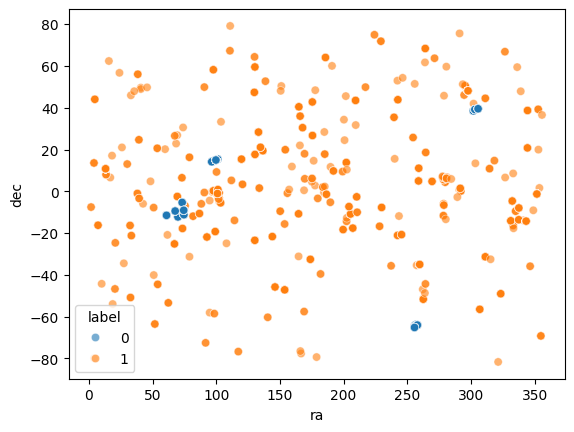

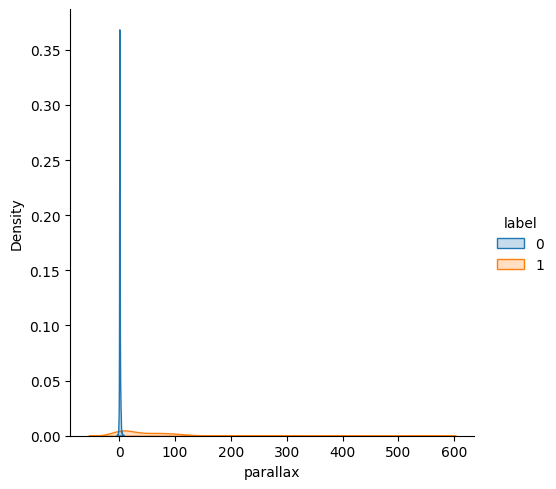

In [5]:
#Plot results 

sns.scatterplot(data=df, x="ra", y="dec", hue="label", alpha=0.6)
plt.show()

sns.displot(data=df, x="parallax", hue="label", kind="kde", fill=True)
plt.show()

## Save Plots


In [ ]:
plot_dir = Path("../plots"); plot_dir.mkdir(exist_ok=True)
#first plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="ra", y="dec", hue="label", alpha=0.5)
plt.tight_layout()
plt.savefig(plot_dir / "stars_vs_exoplanets.png", dpi=200, bbox_inches="tight")
plt.close()


In [ ]:
#second plot
# Plot 2
plt.figure(figsize=(8,6))
sns.displot(data=df, x="parallax", hue="label", kind="kde", fill=True)
plt.savefig(plot_dir / "parallax_kde.png", dpi=200, bbox_inches="tight")
plt.close()


<Figure size 800x600 with 0 Axes>